In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/tmp/ipykernel_428733/3338272293.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
p141 = pd.read_csv('pvels141.csv')
p188 = pd.read_csv('pvels188.csv')
p197 = pd.read_csv('pvels197.csv')
p211 = pd.read_csv('pvels211.csv')

p141['swarm'] = 1
p188['swarm'] = 2
p197['swarm'] = 3
p211['swarm'] = 4

pvels = pd.concat([p141, p188, p197, p211]).reset_index()

pvels = pvels[pvels.depths > 150]

depths = pvels.depths
ptimes = pvels.ptimes
vels = pvels.velocity
swarm_n = pvels.swarm

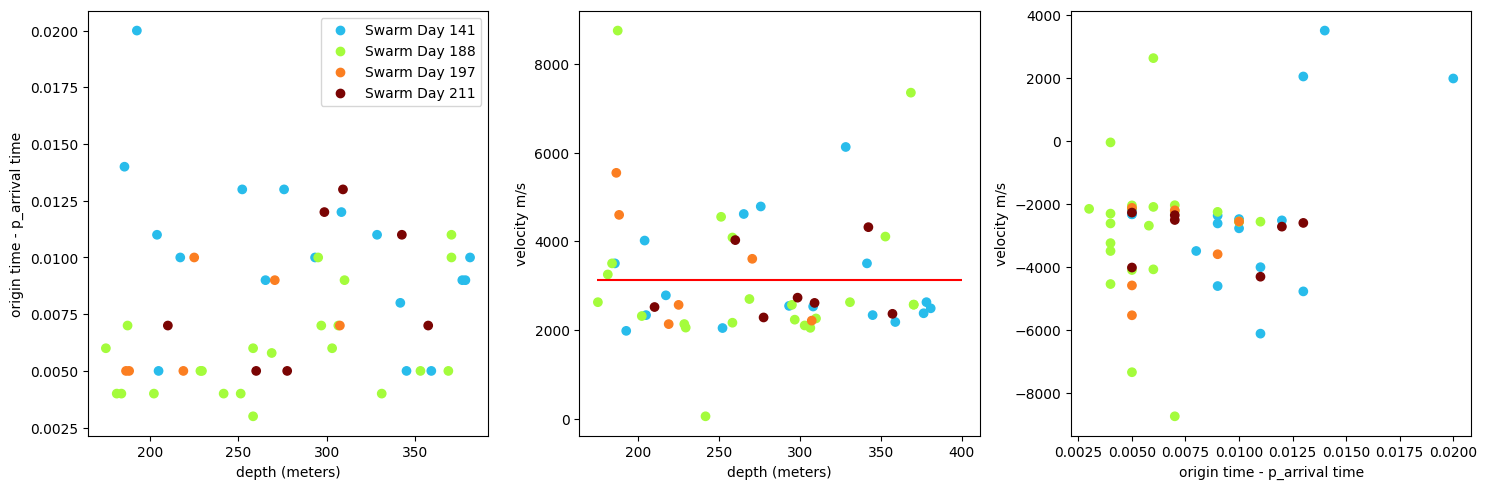

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

colors = swarm_n/4

ax[0].plot([],[], color=plt.cm.turbo(1/4), linestyle='', marker='o', label='Swarm Day 141')
ax[0].plot([],[], color=plt.cm.turbo(2/4), linestyle='', marker='o', label='Swarm Day 188')
ax[0].plot([],[], color=plt.cm.turbo(3/4), linestyle='', marker='o', label='Swarm Day 197')
ax[0].plot([],[], color=plt.cm.turbo(4/4), linestyle='', marker='o', label='Swarm Day 211')
ax[0].legend()

ax[0].scatter(depths, ptimes, c=plt.cm.turbo(colors))
ax[0].set_xlabel('depth (meters)')
ax[0].set_ylabel('origin time - p_arrival time')

ax[1].scatter(depths, np.abs(vels), c=plt.cm.turbo(colors))
ax[1].hlines(y=np.abs(vels).mean(), xmin=175, xmax=400, color='red')
# ax[1].set_xlim(175, 400)
ax[1].set_xlabel('depth (meters)')
ax[1].set_ylabel('velocity m/s')

ax[2].scatter(ptimes, vels, c=plt.cm.turbo(colors))
ax[2].set_xlabel('origin time - p_arrival time')
ax[2].set_ylabel('velocity m/s')

fig.tight_layout()

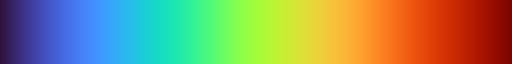

In [13]:
plt.cm.turbo